<a href="https://colab.research.google.com/github/ahmed-hazem-1/DEPI-Tasks/blob/main/FullTitanicPloting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Load and Inspect the Data

1.	Import the necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


2.	Load the Titanic dataset.

In [ ]:
file =pd.read_csv("Titanic.csv")



3.	Display:

The first few rows of the dataset.

In [ ]:
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


o	Basic information about the dataset (e.g., columns, data types, and null values).

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Summary statistics for numerical columns.

In [ ]:
file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Step 2: Handle Missing Values

1.	Identify columns with missing values.

In [ ]:
file.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


2.	Handle missing values:

For numerical columns.

In [ ]:
file['Age'].fillna(file['Age'].median())

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

For categorical columns.

In [ ]:
file[["Cabin",'Parch','Embarked']].fillna("Unkown")

,Cabin,Parch,Embarked
0,Unkown,0,Q
1,Unkown,0,S
2,Unkown,0,Q
3,Unkown,0,S
4,Unkown,1,S
...,...,...,...
413,Unkown,0,S
414,C105,0,C
415,Unkown,0,S
416,Unkown,0,S


3.	Provide a brief explanation of your chosen method for handling missing data.

For handling missing values for "Age" colum i choose the median of the ages  

### Step 3: Check for Duplicates

1.	Check if there are duplicate rows in the dataset.

In [ ]:
file.PassengerId.value_counts()
file.Ticket.value_counts()


Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64

There are duplicates at Tickets but other important thing not duplicated like Name and ID

2.	If duplicates exist, remove them.

In [ ]:
file.drop_duplicates(subset='Ticket', keep='first', inplace=True)

3.	Provide a summary of the cleaned dataset.

Now the dataset is cleaned of -> missing values
                              -> duplicated values

### Step 4: Feature Extraction

1.	Focus on the Cabin column:

Extract the first letter of the cabin (e.g., C85 → C).

In [ ]:
file["Cabin"] = file['Cabin'].astype(str).str[0]

Treat missing cabins as a separate category.

In [ ]:
file['Cabin'].replace('n', 'Unknown', inplace=True)

### Step 5: Encode Categorical Variables

1.	Identify columns with categorical data.

"Sex", "Cabin", "Embarked"

Encode categorical features into numerical values.

For "Sex" i'll use one-Hot Encoding

In [ ]:
sex_encoded = pd.get_dummies(file['Sex'], prefix='Sex')
file = pd.concat([file, sex_encoded], axis=1)
file.drop('Sex', axis=1, inplace=True)

If male ==0 then she is female ,so i dropped the female column

In [ ]:
file.drop('Sex_female', axis=1, inplace=True)

For "Cabin" and "Embarked"  i'll use labeling Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
file['Cabin'] = label_encoder.fit_transform(file['Cabin'])

file['Embarked'] = label_encoder.fit_transform(file['Embarked'])

Check Point of my work

In [ ]:
file.to_csv("newTitanic.csv",index=False)

file.to_csv("newTitanic.csv",index=False)

### Step 6: Visualize the Data

1.	Line Plot:

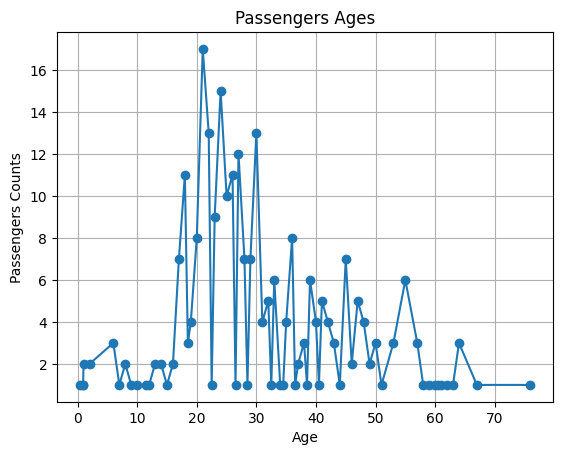

In [ ]:
age_counts = file['Age'].value_counts().sort_index()

plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-')
plt.title('Passengers Ages')
plt.xlabel('Age')
plt.ylabel('Passengers Counts')
plt.grid(True)
plt.show()

2.	Bar Plot:

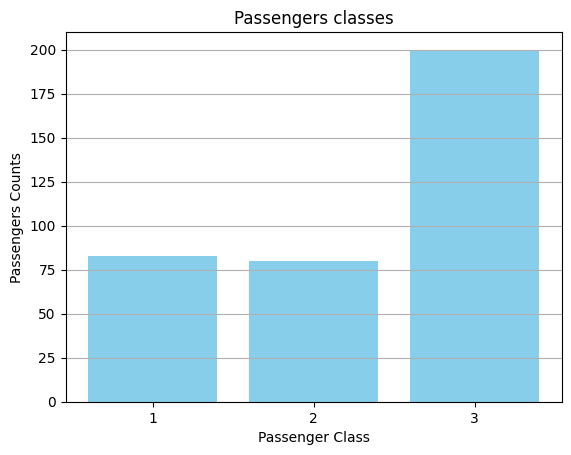

In [ ]:
pclass_counts = file['Pclass'].value_counts().sort_index()

plt.bar(pclass_counts.index, pclass_counts.values, color='skyblue')
plt.title('Passengers classes')
plt.xlabel('Passenger Class')
plt.ylabel('Passengers Counts')
plt.xticks(pclass_counts.index)
plt.grid(axis='y')
plt.show()

3.	Scatter Plot:

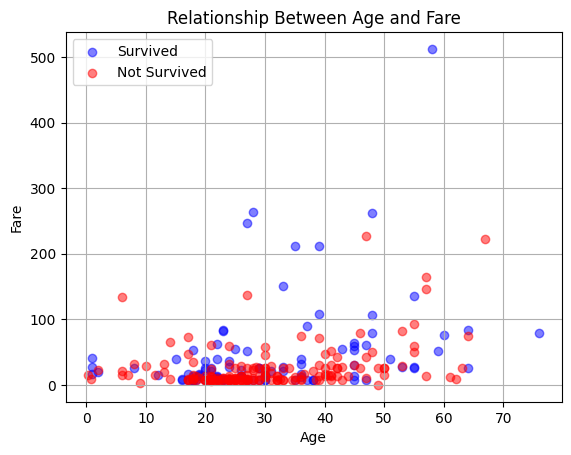

In [ ]:
survived = file[file['Survived'] == 1]
not_survived = file[file['Survived'] == 0]

plt.scatter(survived['Age'], survived['Fare'], c='blue', label='Survived', alpha=0.5)
plt.scatter(not_survived['Age'], not_survived['Fare'], c='red', label='Not Survived', alpha=0.5)

plt.title('Relationship Between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.grid(True)
plt.show()

4.	Histogram:

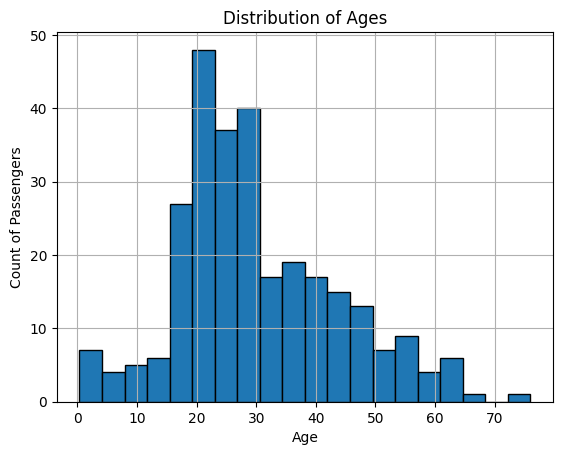

In [ ]:
plt.hist(file['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.grid(True)
plt.show()

5.	Bar Plot for Extracted Cabin Features:

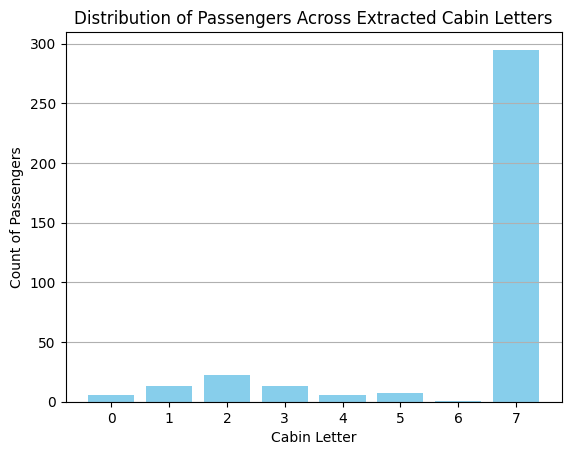

In [ ]:
cabin_counts = file['Cabin'].value_counts().sort_index()


plt.bar(cabin_counts.index, cabin_counts.values, color='skyblue')
plt.title('Distribution of Passengers Across Extracted Cabin Letters')
plt.xlabel('Cabin Letter')
plt.ylabel('Count of Passengers')
plt.xticks(cabin_counts.index)
plt.grid(axis='y')
plt.show()

### Step 7: Draw Insights

passengers who survived generally paid higher fares compared to those who did not survive.

The age distribution shows that most passengers were young adults,